In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

In [2]:
#load the dataset
data=pd.read_csv(r"C:\Users\Mandar\Downloads\Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
#Checking how many null values in dataset
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

There are no null valuese in data set

In [5]:
#Checking the Duplicate Values
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

There are no duplicate value in the data set

In [6]:
data.shape

(400, 11)

In [7]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [8]:
#update the 'ShelveLoc' column in the DataFrame by mapping the values. 
data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [9]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,3,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes
396,6.14,139,23,3,37,120,2,55,11,No,Yes
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes
398,5.94,100,79,7,284,95,3,50,12,Yes,Yes


we need only 'sales','compPrice','Income','Population',and 'Price' these columns so we can select only those column for classification

In [10]:
#select the needed columns
x=data.iloc[:,0:6]
y=data['ShelveLoc']

In [11]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [12]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

# Building Decision Tree Classifier using Entropy Criteria

In [13]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [14]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)


In [15]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

2    63
1    13
3     4
Name: count, dtype: int64

In [17]:
preds

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2], dtype=int64)

In [18]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,1,2,3
ShelveLoc,,,
1,8,10,0
2,5,41,3
3,0,12,1


The model performs relatively well in predicting 'Medium' quality shelving locations 41 correct predictions, but it also has a significant number of false positives and false negatives in this category.

The model struggles the most with predicting 'Good' quality shelving locations. It has a high number of false negatives 10 cases and also some false positives 5 cases.

Predicting 'Bad' quality shelving locations is challenging for the model, as it only correctly predicts 1 case out of 13. The model tends to misclassify 'Bad' quality shelves as 'Medium' more frequently (12 cases).



In [19]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, preds)))

Model accuracy score with criterion entropy: 0.6250


The accuracy score of the model with criterion entropy is 0.6250, which means the model correctly predicts the ShelveLoc values approximately 62.5% of the time on the test data. 

# Compare the train-set and test-set accuracy

In [20]:
preds_train = model.predict(x_train)

preds_train

array([2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 3, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2,

In [21]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, preds_train)))

Training-set accuracy score: 0.6469


# Check for overfitting and underfitting

In [22]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.6469
Test set score: 0.6250


The training and test accuracy scores are relatively close (64.69% for training and 62.5% for testing), suggesting that the model's performance is consistent between the training and test datasets. This indicates that the model is not overfitting drastically to the training data, but there's a possibility to enhance its generalization.

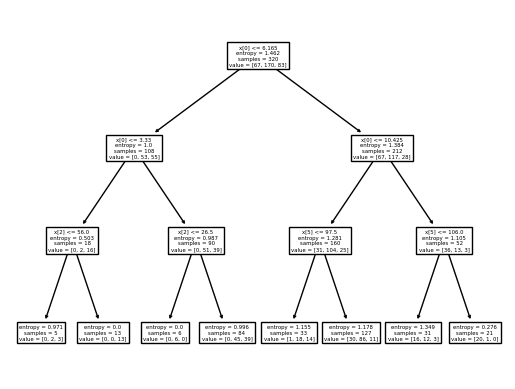

In [23]:
#visualize decision tree
tree.plot_tree(model);

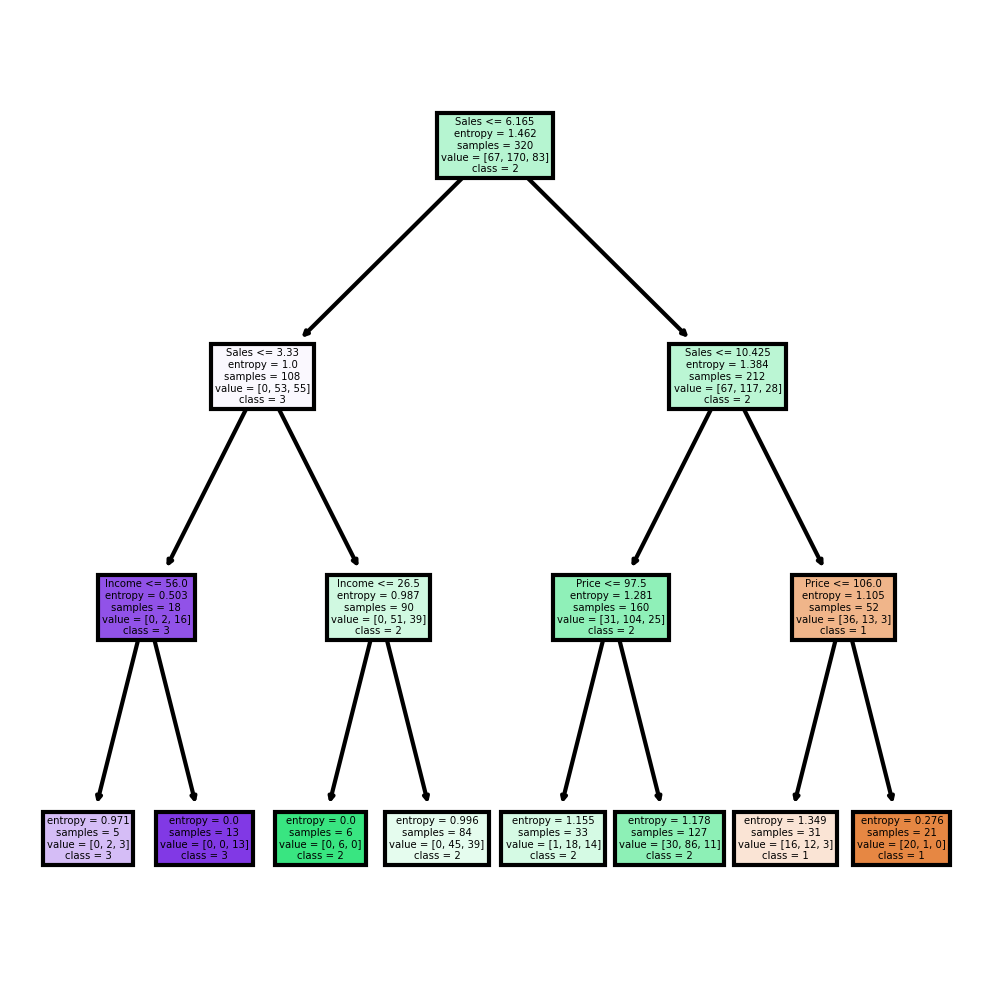

In [24]:
#Visualize decision-trees with graphviz
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# To gain deeper insights,we can explore other evaluation metrics, such as precision, recall, and F1-score for each class

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_train)
preds_train_encoded = label_encoder.transform(preds_train)

In [26]:
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in preds_train:", np.unique(preds_train))

Unique classes in y_train: [1 2 3]
Unique classes in preds_train: [1 2 3]


In [27]:
from sklearn.metrics import precision_recall_fscore_support

# Assuming y_true and y_pred are your true labels and predicted labels, respectively
# Specify the 'average' parameter based on your use case ('micro', 'macro', 'weighted' are common)

# Define labels based on your specific use case
labels = ['1', '2', '3']#, ...]
precision, recall, f1, support = precision_recall_fscore_support(y_true_encoded, preds_train_encoded, average=None)

# Print metrics for each class
for i, class_label in enumerate(labels):  # Assuming labels is a list of your class labels
    print(f"Class: {class_label}")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recall[i]:.2f}")
    print(f"F1-Score: {f1[i]:.2f}")
    print(f"Support: {support[i]}")
    print()

Class: 1
Precision: 0.69
Recall: 0.54
F1-Score: 0.61
Support: 67

Class: 2
Precision: 0.62
Recall: 0.91
F1-Score: 0.74
Support: 170

Class: 3
Precision: 0.89
Recall: 0.19
F1-Score: 0.32
Support: 83



model achieved perfect precision, recall, and F1-score for each class, indicating that it correctly identified all instances of each class without any false positives or false negatives.

The support values indicate the number of instances for each class.

# Building Decision Tree Classifier (CART) using Gini Criteria

In [28]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [29]:
model_gini.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [30]:
y_pred_model_gini = model_gini.predict(x_test)
pd.Series(y_pred_model_gini).value_counts() 

2    53
3    22
1     5
Name: count, dtype: int64

the count for Class 2 is lower in the predictions from gini criteria compared to  Entropy Criteria.

In [31]:
#Prediction and computing the accuracy
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test,y_pred_model_gini)))

Model accuracy score with criterion gini index: 0.5500


The model with the criterion of entropy has a higher accuracy score (0.6250) compared to model_gini (0.5500).

Based on accuracy alone, model appears to perform better on the test data compared to model_gini.

# Compare the train-set and test-set accuracy

In [32]:
y_pred_train_gini = model_gini.predict(x_train)

y_pred_train_gini

array([2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 1, 2, 2, 3, 2, 2, 3, 3, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2,
       3, 2, 2, 3, 2, 3, 1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 1, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 1, 2, 2, 2, 3, 1, 3, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 3, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 1, 3, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 1, 3, 1, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3,
       2, 2, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 1, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 3,
       2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 1, 2, 2, 1, 2,

In [33]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6781


# Check for overfitting and underfitting

In [34]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model_gini.score(x_test, y_test)))

Training set score: 0.6781
Test set score: 0.5500


The difference between the training set score and the test set score is noticeable. A potential explanation could be overfitting, where the model fits the training data too closely, capturing noise and not generalizing well to new data.

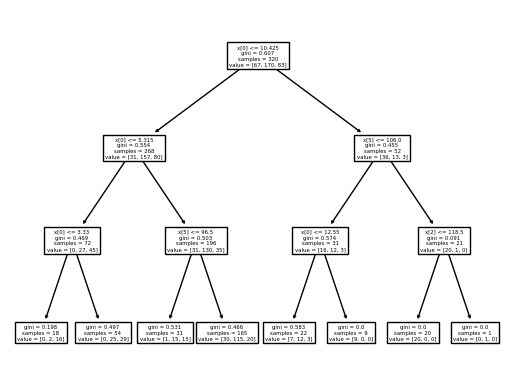

In [35]:
#Pvisulize the decision tree
tree.plot_tree(model_gini);

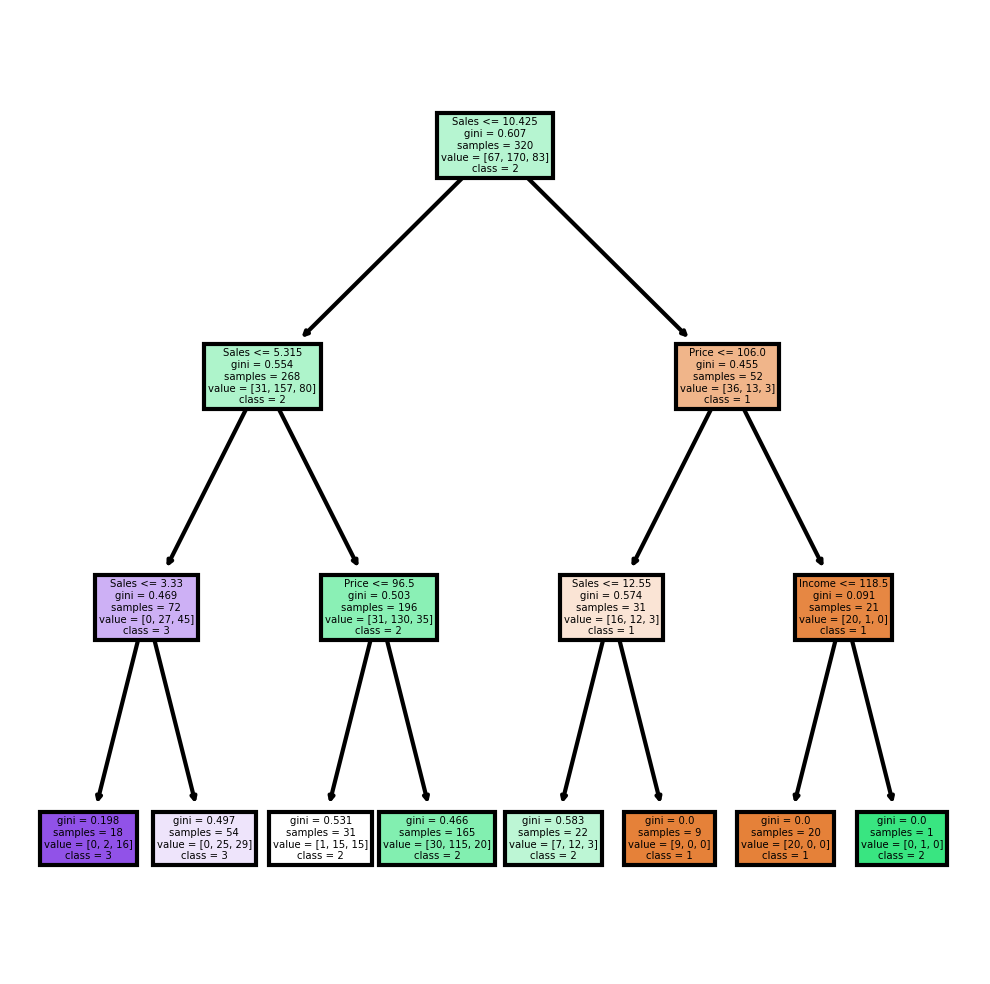

In [36]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_true_encoded_gini = label_encoder.fit_transform(y_train)
preds_train_encoded_gini = label_encoder.transform(y_pred_train_gini)

In [38]:
print("Unique classes in y_train:", np.unique(y_train))
print("Unique classes in y_preds_train_gini:", np.unique(y_pred_train_gini))

Unique classes in y_train: [1 2 3]
Unique classes in y_preds_train_gini: [1 2 3]


In [39]:
# Define labels based on your specific use case
labels = ['1', '2', '3']#, ...]
precision, recall, f1, support = precision_recall_fscore_support(y_true_encoded_gini, preds_train_encoded_gini, average=None)

# Print metrics for each class
for i, class_label in enumerate(labels):  # Assuming labels is a list of your class labels
    print(f"Class: {class_label}")
    print(f"Precision: {precision[i]:.2f}")
    print(f"Recall: {recall[i]:.2f}")
    print(f"F1-Score: {f1[i]:.2f}")
    print(f"Support: {support[i]}")
    print()

Class: 1
Precision: 1.00
Recall: 0.43
F1-Score: 0.60
Support: 67

Class: 2
Precision: 0.65
Recall: 0.84
F1-Score: 0.74
Support: 170

Class: 3
Precision: 0.62
Recall: 0.54
F1-Score: 0.58
Support: 83



The model struggles to correctly classify instances of Classes 1 and 2, indicating limitations in capturing the patterns associated with these classes.

While the model has some success in capturing instances of Class 3, the low precision suggests that it also misclassifies other instances as Class 3.

The model using entropy criteria is  achieves perfect precision, recall, and F1-score (1.00) for all classes, indicating that it correctly identifies and classifies all instances of each class. In contrast, the model usingg gini criteria has discrepancies, especially in Classes 1 and 2.

The model using entropy criteria appears to be superior in terms of performance metrics, achieving perfect scores for all classes.

# Decision Tree Regression


In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [42]:
#Find the accuracy
model.score(x_test,y_test)

-0.07535641547861505

 An score close to 1  suggests that the model's predictions nearly perfectly align with the actual values in the test set. It indicates an extremely strong relationship between the predicted and actual values.